In [107]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [109]:
df_train= pd.read_csv("C:\\Users\\salma\\Downloads\\churn-bigml-80.csv")
df_test=pd.read_csv("C:\\Users\\salma\\Downloads\\churn-bigml-20.csv")

In [111]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [117]:
X_train=df_train.drop('Churn',axis = 1)#features train
y_train=df_train['Churn']#label train

In [119]:
X_test=df_test.drop('Churn',axis = 1)#features test
y_test=df_test['Churn']#label test

In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
#Apply the transformations to your training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Now you can fit your model with the processed, all-numeric data
svc_model = SVC()
svc_model.fit(X_train_processed, y_train)

# And make predictions
test_pred = svc_model.predict(X_test_processed)
train_pred = svc_model.predict(X_train_processed)

In [140]:
svc_model=SVC()

In [142]:
def apply_model(model):
    model.fit(X_train,y_train)
    test_pred=model.predict(x_test)
    trian_pred = model.predict(X_train)
    print('train predection')
    print(classification_report(y_train,trian_pred))
    print ('test predection')
    print(classification_report(y_test,test_pred))
    sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt='d')

In [144]:
apply_model(svc_model)

ValueError: could not convert string to float: 'KS'

# **AUC**

The AUC score for the SVM model is: 0.9386


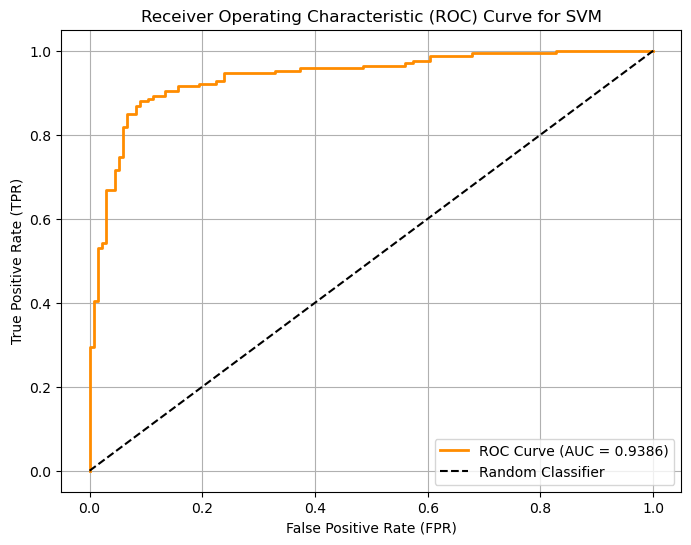

In [93]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
# A. Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5,
                           n_classes=2, flip_y=0.2, random_state=42)

# B. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# C. Initialize and train the SVM model
# IMPORTANT: Set probability=True to enable prediction probability output
# This is required for calculating the ROC curve and AUC score
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# D. Predict probabilities on the test set
# We need the probabilities of the positive class (index 1)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# E. Calculate the AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"The AUC score for the SVM model is: {auc_score:.4f}")

# F. Plot the ROC Curve
# The roc_curve function returns the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal dashed line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()